In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve, accuracy_score, classification_report
import plotly.express as px
from dython.nominal import associations
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [3]:
df = pd.read_csv("mushrooms (1).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
"""
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family.
As we can see the data contains many categorical features, with many associated labels.

The key for the encodings is below: 
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

Note that class labels are either "e" or "p" for edible or poisonous respectively. 

In this analysis we will try and predict if a mushroom is poisonous depending on its characteristics using several different machine learning models. 
We will also try and see if there are features that are better indicators of edibility. 

Techniques to explore: label encoding, k-folds CV, improved graphics.

The process for this analysis will be as follows:
    - Exploratory Data Analysis & Data Cleaning
    - Data Preprocessing (normally would preprocess after splitting, however in this case using one-hot encoding will not cause data leakage)
    - Data Splitting incl. K-folds Cross Validation
    - ML Modelling 
    - Evaluation Metrics and Tuning

Note: categorical correlation of features is key here

Other questions:
- are particular habitats more prone to having poisonous mushrooms? 
- are bright colours a good indicator of being poisonous?


"""

'\nThis data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family.\nAs we can see the data contains many categorical features, with many associated labels.\n\nThe key for the encodings is below: \n     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s\n     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s\n     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y\n     4. bruises?:                 bruises=t,no=f\n     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s\n     6. gill-attachment:          attached=a,descending=d,free=f,notched=n\n     7. gill-spacing:             close=c,crowded=w,distant=d\n     8. gill-size:                broad=b,narrow=n\n     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,

In [8]:
df.nunique()


class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
#dropping type as only 1 type is present here, so offers no new information
df.drop("veil-type", axis =1,  inplace=True)

In [10]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [11]:
#As we can see the variables are stored as object types which is not helpful when working with pandas. 
#Therefore, we will convert them to categorical types to allow for analysis.
for feature in df:
    df[feature] = df[feature].astype('category')

df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [12]:
#We will do some quick data cleaning, checking for missing values or duplicates
df.isnull().sum() #checking for missing

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
#Checking that all mushrooms are unique 
print('Total mushrooms: {}\nUnique mushrooms: {}'.format(
    len(df.index),
    len(df.drop_duplicates().index)))

Total mushrooms: 8124
Unique mushrooms: 8124


In [14]:
#Checking mushrooms are unique when class is dropped - this checks that mushrooms with the same features don't give different target outcomes
print('Total mushrooms: {}\nCorrectly specified mushrooms: {}'.format(
    len(df.index),
    len(df.drop_duplicates(subset=df.drop(['class'],axis=1).columns).index)))

Total mushrooms: 8124
Correctly specified mushrooms: 8124


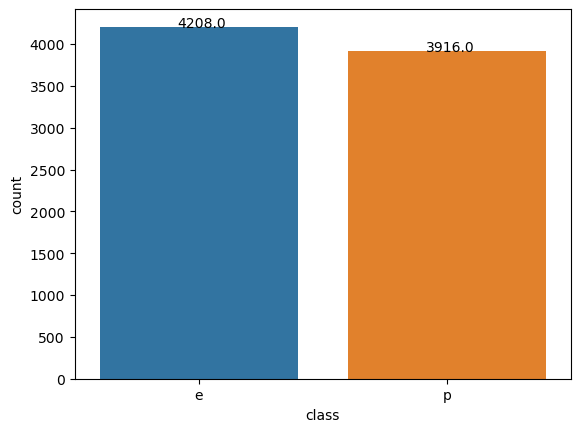

In [15]:
#looking at target variable balance
ax = sns.countplot(df, x = "class")
df["class"].value_counts()
for p in ax.patches:
    txt = str(p.get_height()) 
    txt_x = p.get_x() + 0.315
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt)
#from this we can see there are 2 outcomes to the target variable, and are reasonably balanced. 

In [16]:
#group the data into its characteristics for grouped visuals
mush_char_dict = {
    "cap" : ["cap-shape", "cap-surface", "cap-color"],
    "gill" : ["gill-attachment", "gill-spacing", "gill-size", "gill-color"],
    "stalk" : ["stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring"],
    "veil" : ["veil-color"],
    "ring" : ["ring-number", "ring-type"],
    "spore" : ["spore-print-color"],
    "other": ["bruises", "odor", "population", "habitat"]

}

In [17]:
def UVA_category(data, var_group, hue_var = None):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (5*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    if hue_var:
      sns.countplot(y = i, hue =hue_var, data = df)
      plt.xlabel('count', fontsize = 10)
    else:
      sns.barplot(x=norm_count, y=norm_count.index, order=norm_count.index)
      plt.xlabel('proportion', fontsize = 10)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title(f"{i}", fontsize = 15)



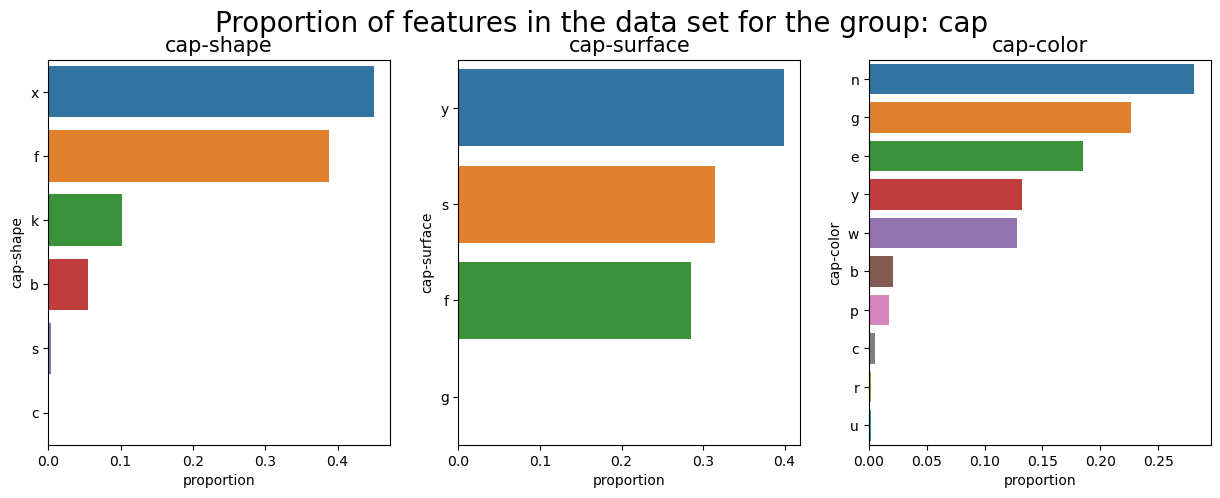

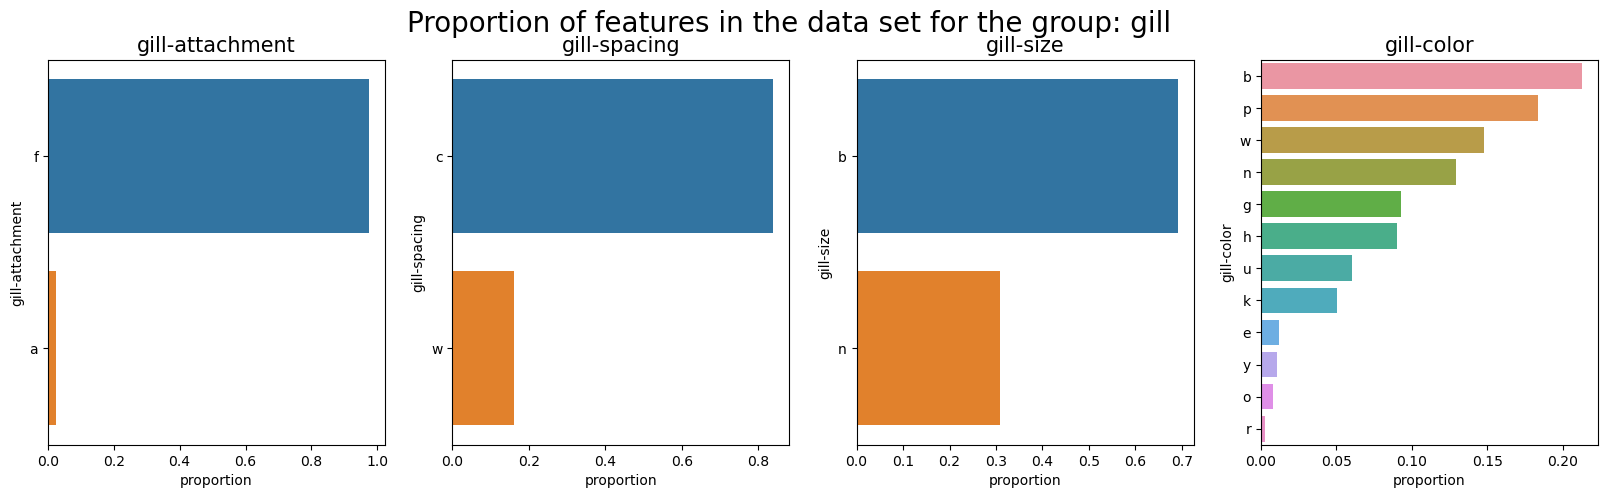

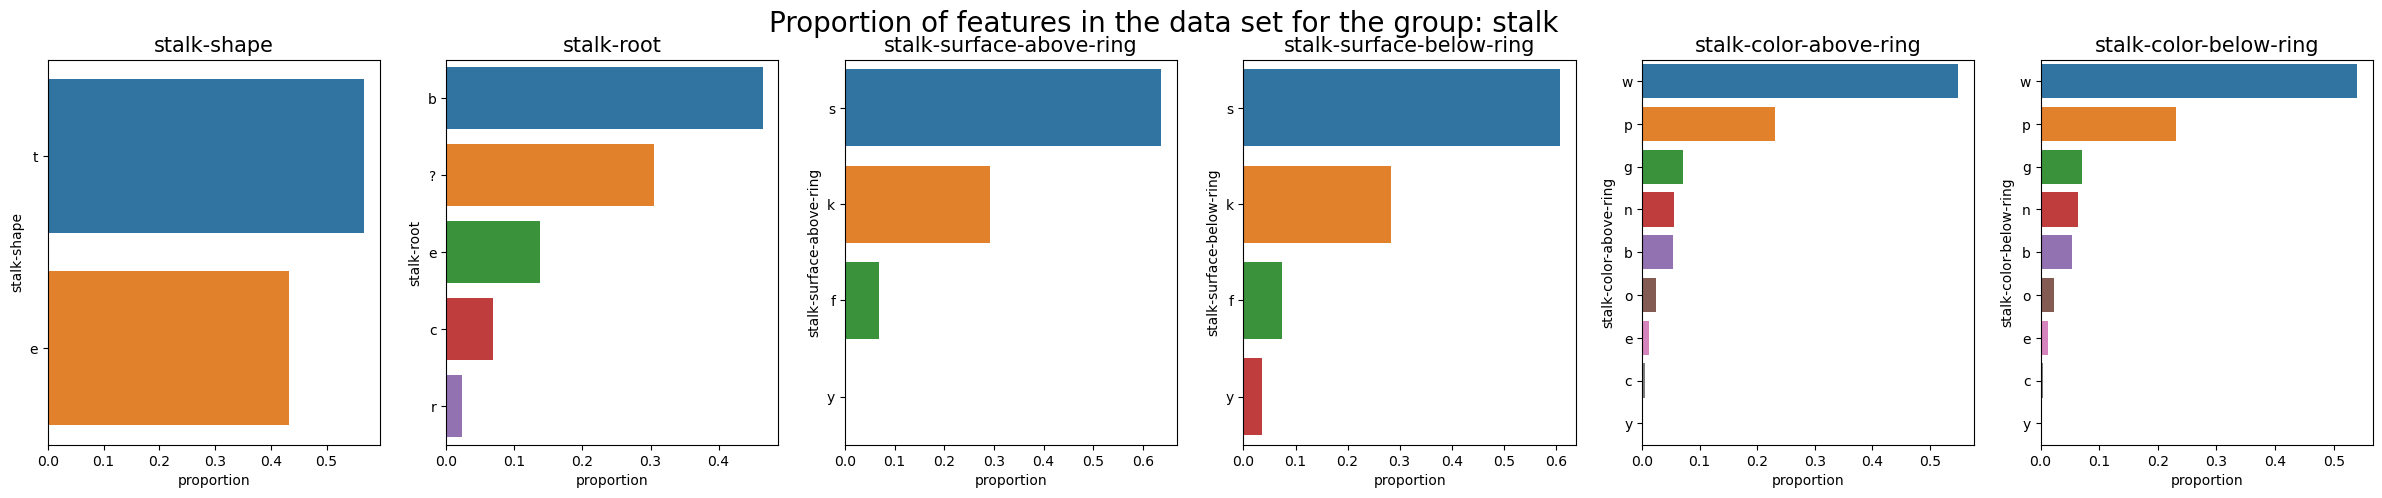

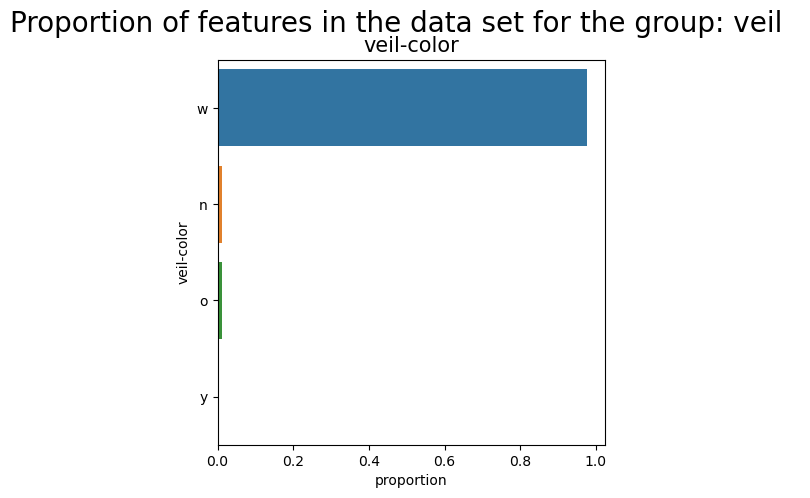

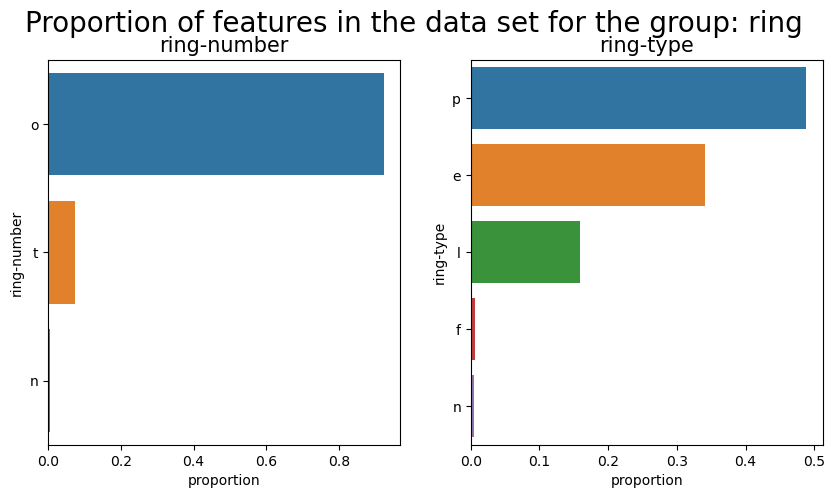

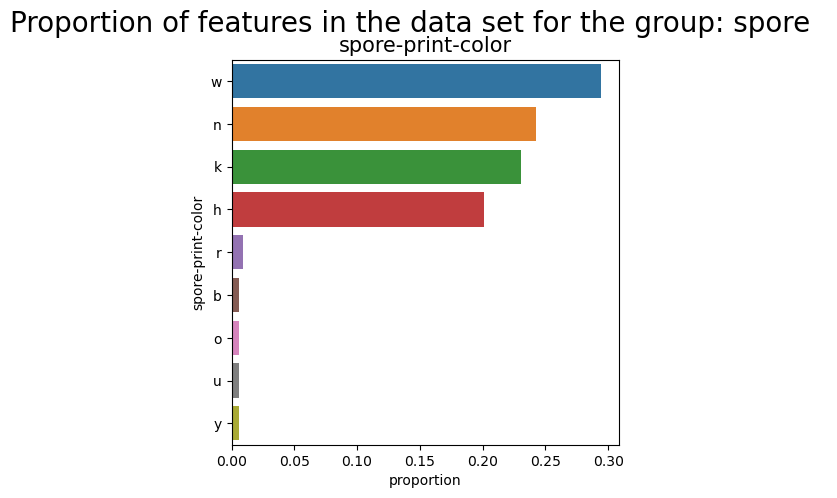

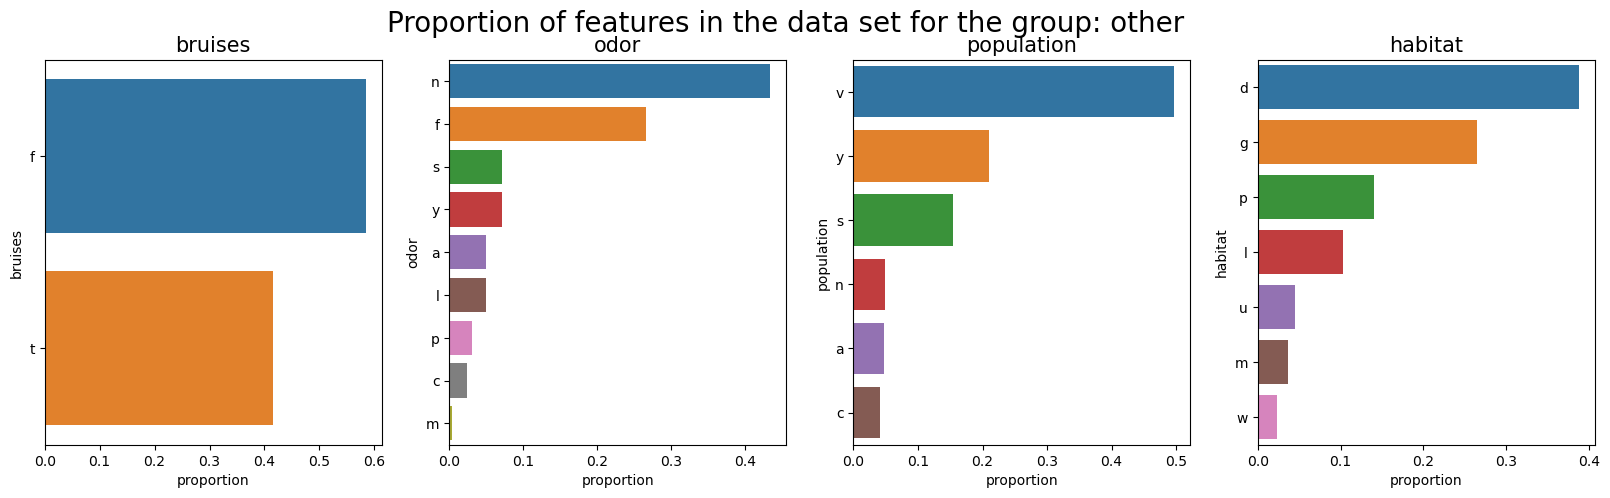

In [18]:
for char in mush_char_dict:
    UVA_category(df, mush_char_dict[char])
    plt.suptitle(f"Proportion of features in the data set for the group: {char}  \n ", fontsize = 20)

Text(0.5, 1.0, 'The number of edible and poisonous mushrooms dependent on cap colour')

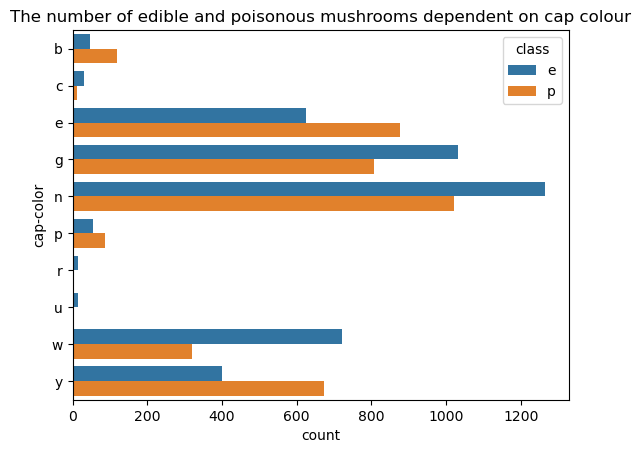

In [19]:
sns.countplot(y = "cap-color", hue ="class", data = df)
plt.title("The number of edible and poisonous mushrooms dependent on cap colour")

Text(0.5, 1.0, 'The number of edible and poisonous mushrooms dependent on habitat')

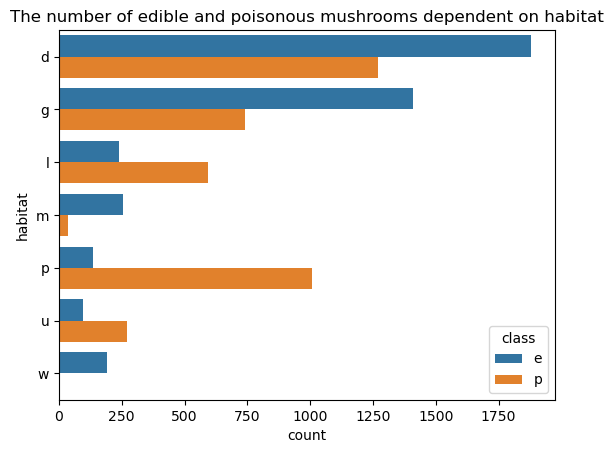

In [46]:
sns.countplot(y = "habitat", hue ="class", data = df)
plt.title("The number of edible and poisonous mushrooms dependent on habitat")

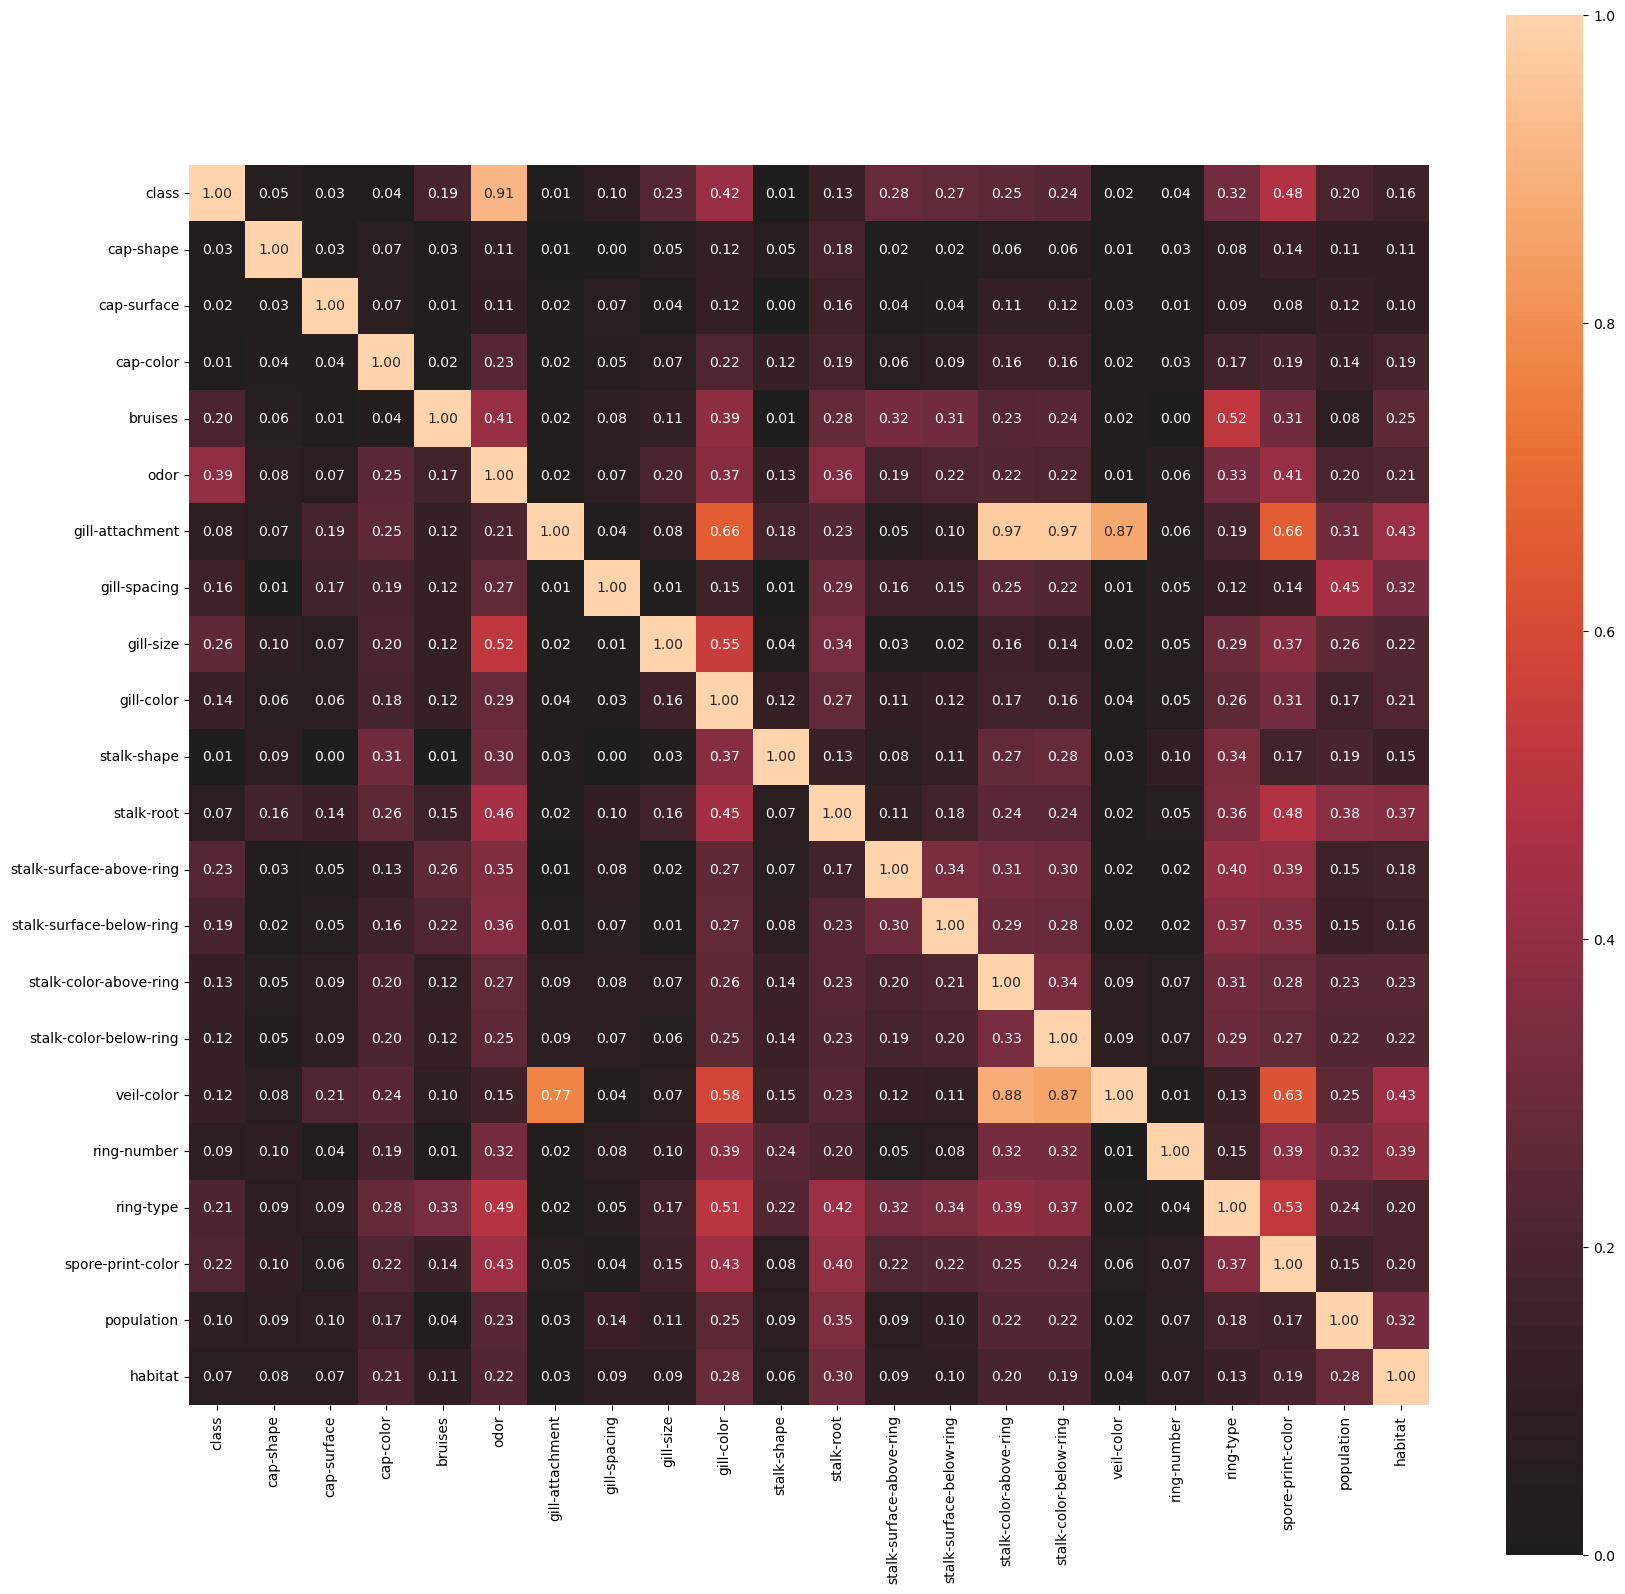

{'corr':                              class  cap-shape  cap-surface  cap-color  \
 class                     1.000000   0.048842     0.028617   0.036083   
 cap-shape                 0.029522   1.000000     0.030204   0.067283   
 cap-surface               0.018147   0.031688     1.000000   0.070244   
 cap-color                 0.014361   0.044305     0.044089   1.000000   
 bruises                   0.196440   0.057126     0.013462   0.041292   
 odor                      0.390648   0.080488     0.071845   0.245707   
 gill-attachment           0.081818   0.069684     0.186513   0.251221   
 gill-spacing              0.158154   0.007295     0.166868   0.193235   
 gill-size                 0.257946   0.098364     0.068052   0.202591   
 gill-color                0.137597   0.063356     0.063236   0.180369   
 stalk-shape               0.007616   0.085221     0.004689   0.310193   
 stalk-root                0.073957   0.164642     0.141559   0.255696   
 stalk-surface-above-ring  0.2

In [21]:
#here we have imported a library to calculate the categorical associations of the dataset, however, since the data might have issues with asymmetry we have used theil's U to compute it. 
#this is taken from this link: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9 which uses the same dataset
#note that the article is old, the matrix now shows U(row | column) whereas in the article it shows U(column | row)

associations(df, figsize= (20,20), nom_nom_assoc = "theil")

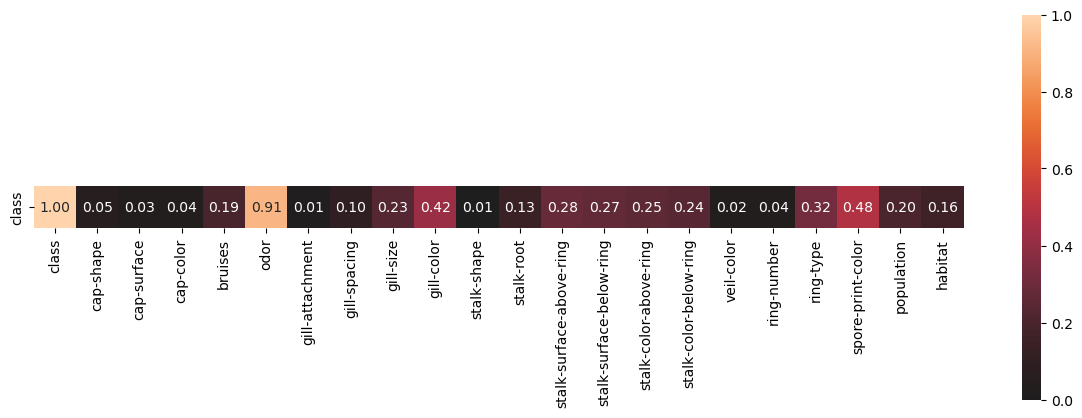

{'corr':        class  cap-shape  cap-surface  cap-color   bruises     odor  \
 class    1.0   0.048842     0.028617   0.036083  0.192559  0.90692   
 
        gill-attachment  gill-spacing  gill-size  gill-color  ...  \
 class         0.014178      0.100977   0.230369    0.417367  ...   
 
        stalk-surface-above-ring  stalk-surface-below-ring  \
 class                  0.284991                  0.272148   
 
        stalk-color-above-ring  stalk-color-below-ring  veil-color  \
 class                0.254082                0.241641    0.023839   
 
        ring-number  ring-type  spore-print-color  population  habitat  
 class     0.038489   0.318318           0.481153    0.202146  0.15698  
 
 [1 rows x 22 columns],
 'ax': <Axes: >}

In [22]:
associations(df, figsize= (15,5), nom_nom_assoc = "theil", display_rows= ["class"])
#from this matrix we can see the correlation between class and the dependent variables.
# to reduce the number of variables we will be working with, we will take only the variables 

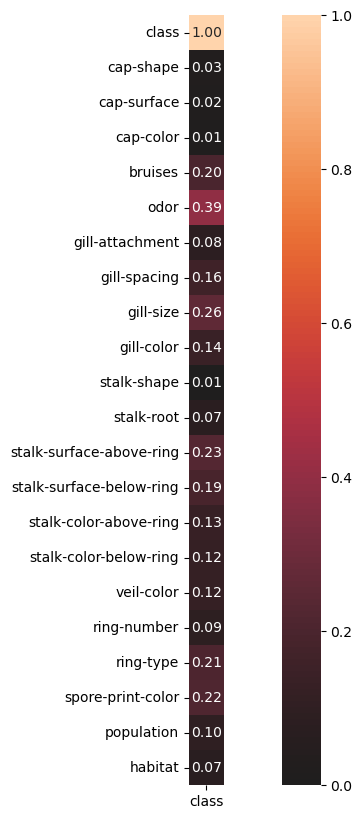

{'corr':                              class
 class                     1.000000
 cap-shape                 0.029522
 cap-surface               0.018147
 cap-color                 0.014361
 bruises                   0.196440
 odor                      0.390648
 gill-attachment           0.081818
 gill-spacing              0.158154
 gill-size                 0.257946
 gill-color                0.137597
 stalk-shape               0.007616
 stalk-root                0.073957
 stalk-surface-above-ring  0.233124
 stalk-surface-below-ring  0.194330
 stalk-color-above-ring    0.131064
 stalk-color-below-ring    0.122040
 veil-color                0.121368
 ring-number               0.091406
 ring-type                 0.207164
 spore-print-color         0.218182
 population                0.100808
 habitat                   0.068946,
 'ax': <Axes: >}

In [47]:
associations(df, figsize= (15,10), nom_nom_assoc = "theil", display_columns= ["class"])

In [23]:
chosen_features = ["odor", "gill-size", "gill-color", "stalk-surface-above-ring", "stalk-surface-below-ring","stalk-color-above-ring", "stalk-color-below-ring", "ring-type", "spore-print-color", "population"]

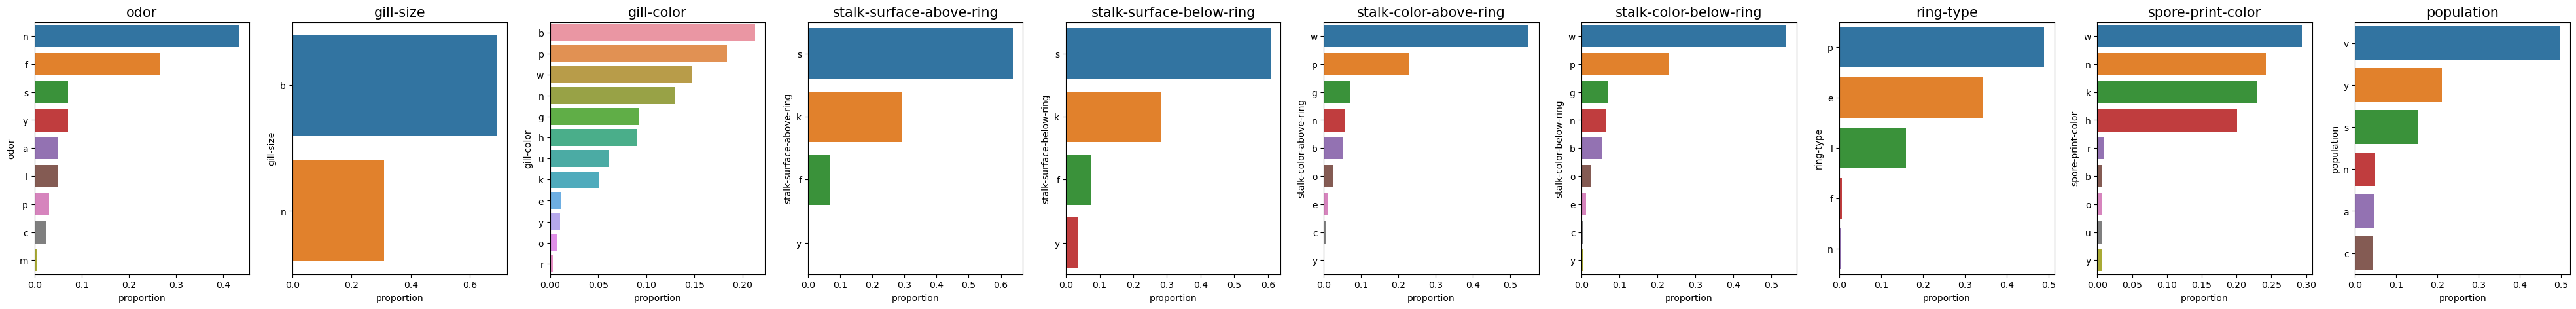

In [24]:
UVA_category(df, chosen_features)

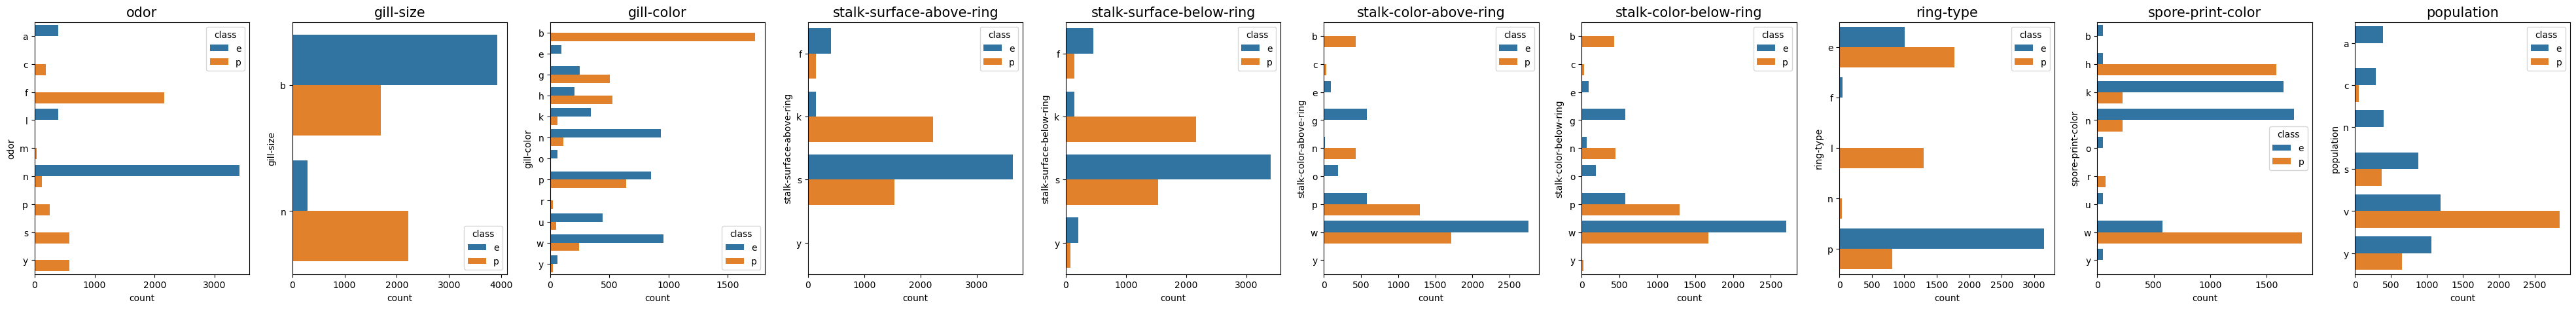

In [25]:
UVA_category(df, chosen_features, "class")

In [26]:
#since our features are labeled - it might be easier if we run a one-hot encoder to numerically represent the data, and see if we can find any trends
ohe = OneHotEncoder(handle_unknown="ignore")
ohe_eda_data = ohe.fit_transform(df[chosen_features])

In [27]:
ohe_eda_data = ohe_eda_data.toarray()

In [28]:
ohe_eda_data = pd.DataFrame(ohe_eda_data, columns = ohe.get_feature_names_out(chosen_features))
ohe_eda_data.head()

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-size_b,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X = ohe_eda_data
y = df["class"]

In [30]:
X

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-size_b,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8121,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Map class or our target variable to a binary classifier
poison_dummy =  {
    "e" : 0,
    "p" : 1
}
y = y.map(poison_dummy)


In [32]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size=0.8, random_state=32)

In [33]:
##Machine Learning
# Logistic Regression fitting the model
LR_CV = LogisticRegressionCV(cv= 5, random_state= 32, penalty= "l2").fit(X_train, y_train)
y_pred_LR = LR_CV.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LR)
print("Accuracy: {}".format(accuracy))
print(classification_report(y_test,y_pred_LR))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [34]:
#K-nearest-neighbours
stored_acc = []
for neighbor in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train.values, y_train)
    y_pred_knn = knn.predict(X_test.values)
    accuracy = accuracy_score(y_test, y_pred_knn)
    print("Accuracy score for neighbour {}: {}".format(neighbor, accuracy))
    
    stored_acc.append(accuracy)

Accuracy score for neighbour 2: 1.0
Accuracy score for neighbour 3: 1.0
Accuracy score for neighbour 4: 1.0
Accuracy score for neighbour 5: 1.0
Accuracy score for neighbour 6: 1.0
Accuracy score for neighbour 7: 1.0
Accuracy score for neighbour 8: 1.0
Accuracy score for neighbour 9: 1.0
Accuracy score for neighbour 10: 1.0


In [35]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_mat_knn) 
print(classification_report(y_test,y_pred_knn))

[[846   0]
 [  0 779]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [36]:
""" # code to plot changes in neighbours for knn but no changes to plot
loc = np.arange(2,10,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(2,10), stored_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()
"""

" # code to plot changes in neighbours for knn but no changes to plot\nloc = np.arange(2,10,step=1.0)\nplt.figure(figsize = (10, 6))\nplt.plot(range(2,10), stored_acc)\nplt.xticks(loc)\nplt.xlabel('Number of Neighbors ')\nplt.ylabel('Accuracy')\nplt.show()\n"

In [37]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [2,4,6,8,10],
               'weights' : ['distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1, scoring='roc_auc')
g_res_knn = gs_knn.fit(X_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [38]:
print("Model: KNN \nBest score: {}\nBest hyperparameters: {} ".format(g_res_knn.best_score_, g_res_knn.best_params_))

Model: KNN 
Best score: 1.0
Best hyperparameters: {'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'} 


In [39]:
knn_hp = KNeighborsClassifier(n_neighbors=2, metric = "minkowski", weights = "distance").fit(X_train.values, y_train)
y_pred_hp = knn_hp.predict(X_test.values)
accuracy = accuracy_score(y_pred_hp, y_test)
print("Accuracy score for neighbour {}: {}".format(2, accuracy))
conf_mat_knn_hp = confusion_matrix(y_test, y_pred_hp)
print(conf_mat_knn_hp) 
print(classification_report(y_test,y_pred_hp))

Accuracy score for neighbour 2: 1.0
[[846   0]
 [  0 779]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [40]:
## Decision Tree Model
grid_params = { 'max_features': ['sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['gini', 'entropy'],}
gs_dtc = GridSearchCV(DecisionTreeClassifier(random_state=32), grid_params, verbose = 1, cv=5, n_jobs = -1, scoring='roc_auc')
g_res_dtc = gs_dtc.fit(X_train, y_train)
print("Model: Decision Tree \nBest score: {}\nBest hyperparameters: {} ".format(g_res_dtc.best_score_, g_res_dtc.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model: Decision Tree 
Best score: 0.9997840512719002
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'} 


In [41]:
## Random Forest Model
grid_params = { 'n_estimators': [200,300,400,500],
                'max_features': ['sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['gini', 'entropy'],}
gs_rfc = GridSearchCV(RandomForestClassifier(random_state=32), grid_params, verbose = 1, cv=5, n_jobs = -1, scoring='roc_auc')
g_res_rfc = gs_rfc.fit(X_train, y_train)
print("Model: Random Forest \nBest score: {}\nBest hyperparameters: {} ".format(g_res_rfc.best_score_, g_res_rfc.best_params_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Model: Random Forest 
Best score: 1.0
Best hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300} 


In [42]:
## SVM Model 
grid_params = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svm = GridSearchCV(SVC(),  grid_params, verbose = 1, cv=5, n_jobs = -1, scoring='roc_auc')
g_res_svm = grid_svm.fit(X_train, y_train) 
print("Model: SVM \nBest score: {}\nBest hyperparameters: {} ".format(g_res_svm.best_score_, g_res_svm.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Model: SVM 
Best score: 1.0
Best hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'} 


In [43]:
#ANN

## initialise the neural network
model = Sequential()

#setup the input layer 
model.add(Dense(units = 16, kernel_initializer = "uniform", activation = "relu", input_dim = 69))

## hidden layer
model.add(Dense( units = 8, kernel_initializer = "uniform", activation = "relu"))


# regularisation

model.add(Dropout(0.25)) #drop some of the data to reduce overfitting 

#output layer
model.add(Dense(units = 1, kernel_initializer  = "uniform", activation = "sigmoid"))

#compile the network
## optimizers - adam, sgd, rmsprop-- root mean square propagation
# for binary classification -- binary cross entropy, multiclass classification -- categorical_cross_entrop
model.compile(optimizer = "adam", loss= "binary_crossentropy", metrics= ["accuracy"])

In [51]:
history = model.fit(X_train, y_train, batch_size = 25, epochs = 10, validation_split=0.25)
val_accuracy = np.mean(history.history['val_accuracy'])
print("Model: ANN \nmean_val_accuracy is {}".format(val_accuracy))

Epoch 1/10
195/195 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 4.4971e-11 - val_accuracy: 1.0000
Epoch 2/10
195/195 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 3.2627e-11 - val_accuracy: 1.0000
Epoch 3/10
195/195 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 3.9030e-11 - val_accuracy: 1.0000
Epoch 4/10
195/195 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 2.6295e-11 - val_accuracy: 1.0000
Epoch 5/10
195/195 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 3.3551e-11 - val_accuracy: 1.0000
Epoch 6/10
195/195 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 3.3649e-11 - val_accuracy: 1.0000
Epoch 7/10
195/195 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 2.6268e-11 -